<a href="https://colab.research.google.com/github/abigailcrowo/KNN/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I USED COPILOT TO ASSIST ME

## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Q1, 1. The main difference between regression and classification is that regression produces continuous numerical values, whereas classification determines categories. Ultimately, the main difference is the ouput. Regression outputs numbers, whereas classification outputs categories.

Q1, 2. A confusion table shows 4 potential outcomes: true positive, false positive, true negative, false negative. It helps us understand how accurate a model truly is. If majority of outcomes are true positive and true negative, it indicates accuracy. Meanwhile, if most outcomes are false negative and false positivey, it indicates inaccuracy.

Q1, 3: The SSE adds up the squared differences. By doing so, it calculates the sum of prediction error in a regression model. Therefore, the SSE quantifies the weaknesses of a particular model, by calculating the total error.

Q1, 4: Underfitting means that the model does not capture the true patterns in the data to the extent it should. It is not detailed nor specific enough. On the other hand, overfitting means that the model contains too many specifics, and has data it could ultimately leave out. Underfitting means the model doesn't have enough features, whereas overfitting means the model is too complex.

Q1, 5: With these machine learning techniques, the model can learn and recongize the real trends of the data. By splitting the data into training and testing sets, it can build and adjust the model as needed. The model picks up onto the trends and patterns, and adapts to make it more accurate. The testing set evaluates how well the model peforms on the new data provided. This ultimately improves model peformance as the model continues to adapt and adjust to the new data.

Q1, 6. There are tradeoffs to this approach of reporting a class label as a prediction or probability distrbution over class labels. Positives include showing risk, allowing for flexibility, and providing additional information. Weaknesses include the model being a little more difficult to comprehend, and some estimates not being the most accurate.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
   year  year_norm  mileage  mileage_norm
0  2008   0.744681   274117      0.269287
1  2011   0.808511   190552      0.187194
2  2018   0.957447    39590      0.038892
3  2014   0.872340    64146      0.063016
4  2018   0.957447     6654      0.006537
Training set shape: (1999, 5)
Evaluation set shape: (500, 5)
      price  year  mileage  year_norm  mileage_norm
109   23100  2018    49496   0.957447      0.048624
2296   8000  2018    54692   0.957447      0.053728
354       0  2009   180364   0.765957      0.177186
266   17100  2019    15780   0.978723      0.015502
2102  16300  2018    69480   0.957447      0.068256
k=3, Mean Squared Error=148065935.52


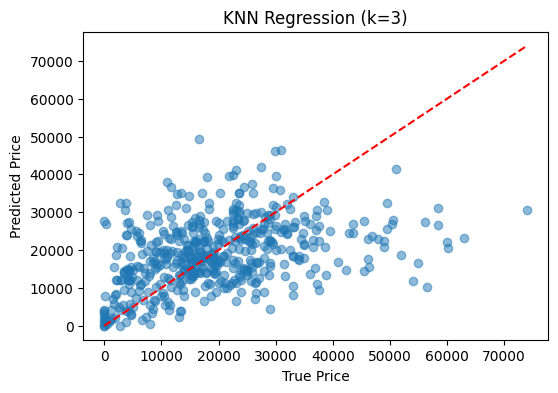

k=10, Mean Squared Error=117399126.11


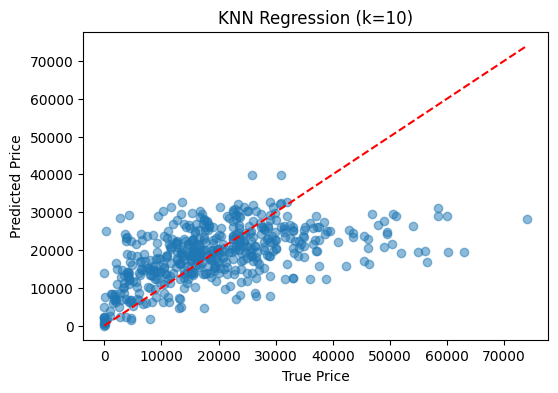

k=25, Mean Squared Error=112576160.82


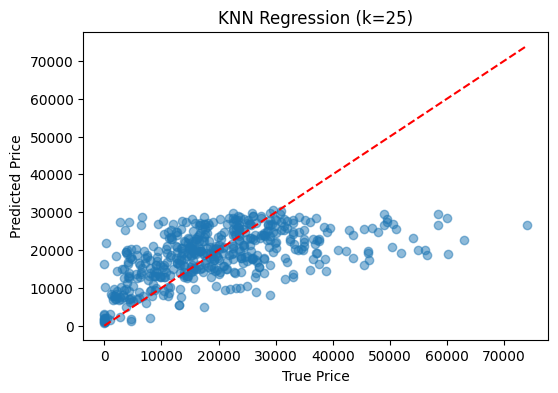

k=50, Mean Squared Error=110202549.30


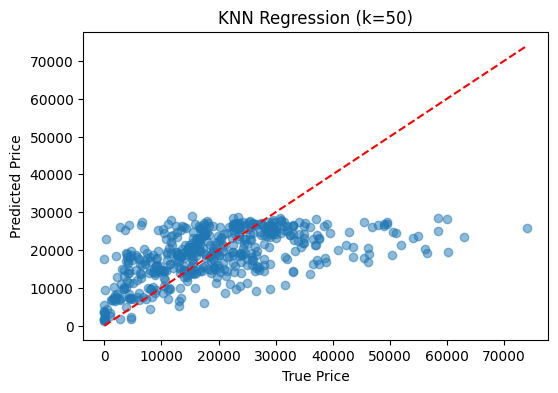

k=100, Mean Squared Error=112253932.82


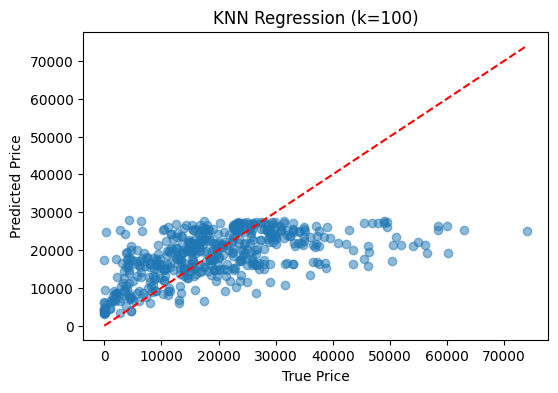

k=300, Mean Squared Error=114496301.83


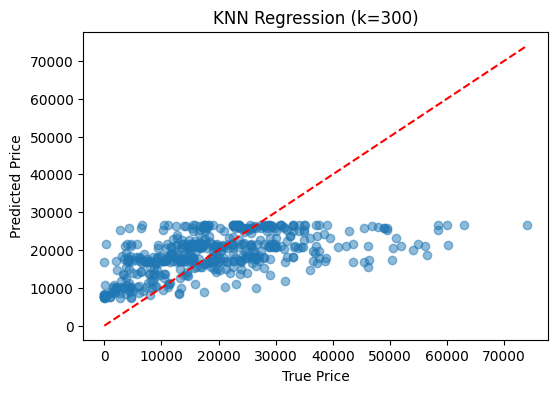


Optimal k is 300 with MSE=114496301.83


In [14]:
#Q2, 1.
#Properly import pandas
import pandas as pd
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
#Load the dataset using path from my drive
df = pd.read_csv('/content/drive/MyDrive/DATA/USA_cars_datasets.csv')
#Get rid of the other columns
df = df[['price', 'year', 'mileage']]
#See if there are any missing values
print(df.isna().sum())
#Print out the first few rows
print(df.head())
#Code for the Dimensions
print(df.shape)


#Q2, 2.
#import pandas again
import pandas as pd
#use the data frame I had just loaded and the adjusted settings
#apply the min and max
df['year_norm'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage_norm'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())
#output results
print(df[['year', 'year_norm', 'mileage', 'mileage_norm']].head())


#Q2, 3.
#import the test training
from sklearn.model_selection import train_test_split
#split into a training set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
#output the dimensions of the set
print("Training set shape:", train_df.shape)
print("Evaluation set shape:", test_df.shape)
#print the new set
print(train_df.head())



#Q2, 4.
#import the needed parts
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#break down into x training sets and y training sets
#break down into x test sets and y test sets
X_train = train_df[['year_norm', 'mileage_norm']]
y_train = train_df['price']
X_test = test_df[['year_norm', 'mileage_norm']]
y_test = test_df['price']
#determine the values of k that need to be tested
k_values = [3, 10, 25, 50, 100, 300]
#for loop
for k in k_values:
    #fit the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    #determine predictions of the test set
    y_pred = knn.predict(X_test)
    #determine the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"k={k}, Mean Squared Error={mse:.2f}")
    #develop a scatterplot of the true versus predicted data
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("True Price")
    plt.ylabel("Predicted Price")
    plt.title(f"KNN Regression (k={k})")
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--')
    plt.show()

    #As you increase k, the mean squared error increases.
    #There are minimal differences in the visual appearance of the graphs themself as you increase k.



#Q2, 5.
#Determining optimal K
#Determine which is the best k
best_k = None
best_mse = float("inf")
#compute mean squared error in regard to k
if mse < best_mse:
    best_mse = mse
    best_k = k
#prints the output after the code has been executed
print(f"\nOptimal k is {best_k} with MSE={best_mse:.2f}")


#Q2, 6.
#The value of k makes a major difference in the plots of predicted versus actual value. When the value of k was too high, the data was underfit.
#The underfitting of the data as a result of a larger k resulted in a larger predicted error.
#However, by using a smaller value of k to fit the data, overfitting occurred.
#By overfitting the data, a large error was also present.
#Therefore, the value of k makes a major impact as the data can't be overfitted nor underfitted.









**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class labels: [1 4 2 7 6 5 3]

Class 1:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1



Class 4:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4



Class 2:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2



Class 7:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7



Class 6:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6



Class 5:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
89,toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5



Class 3:


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3


Class sizes:
class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64
Training set size: (50, 16)
Test set size: (51, 16)
Best k = 1 with accuracy = 0.961


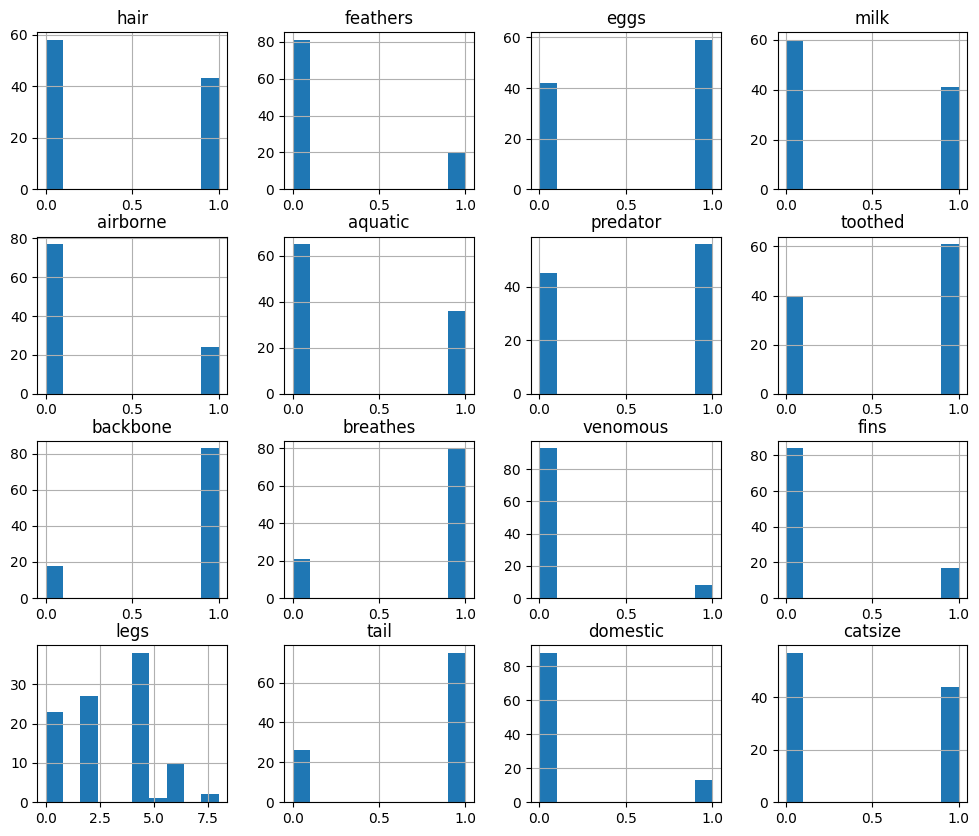

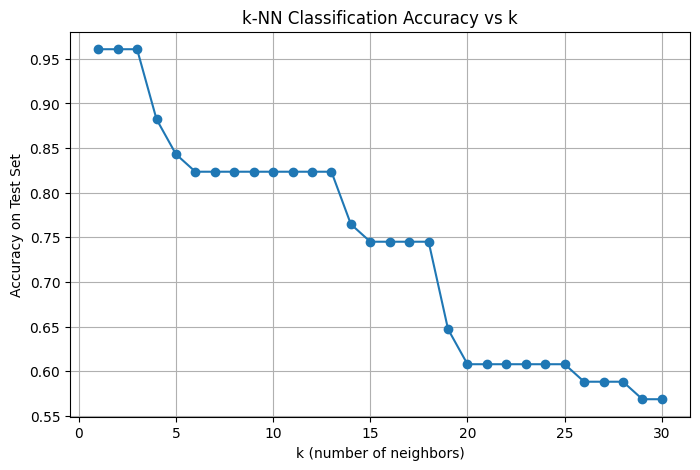

Confusion Matrix:


,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7
Actual 1,21,0,0,0,0,0,0
Actual 2,0,10,0,0,0,0,0
Actual 3,0,0,1,1,0,0,0
Actual 4,0,0,0,7,0,0,0
Actual 5,0,0,0,0,2,0,0
Actual 6,0,0,0,0,0,4,0
Actual 7,0,0,0,0,1,0,4



Accuracy of optimal k-NN model (k=1): 0.961
Confusion Matrix (milk, aquatic, airborne only):


,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7
Actual 1,19,2,0,0,0,0,0
Actual 2,0,7,2,1,0,0,0
Actual 3,0,0,1,1,0,0,0
Actual 4,0,0,0,7,0,0,0
Actual 5,0,0,0,2,0,0,0
Actual 6,0,3,1,0,0,0,0
Actual 7,0,0,1,4,0,0,0


Accuracy: 0.667


In [15]:
#Q3, 1:
#Load the dataset properly using pandas and from google drive
#Q3, 1:
#Load the dataset properly using pandas and from google drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DATA/zoo.csv')
df.head()
#Load the specific 7 class labels in directions
print("Class labels:", df['class'].unique())
#Write code to observe the data within each of the 7 classes
for c in df['class'].unique():
    print(f"\nClass {c}:")
    display(df[df['class'] == c].head())
#Determine the size of each class
class_counts = df['class'].value_counts()
print("Class sizes:")
print(class_counts)
#Determine the variation between features
df.describe()
df.drop(columns=['class']).hist(figsize=(12,10))
#Keep the columns in numbers
#This way, the mean can be calculated
df_numeric = df.select_dtypes(include='number')
#Code to determine which variables would ultimately lead to the best class
group_means = df_numeric.groupby('class').mean()
group_means



#Q3,2
#Splitting the data into 50 50 test sets
#Import necesities
from sklearn.model_selection import train_test_split
# Separate features by x and y
# Keep only numeric columns for modeling
df_numeric = df.select_dtypes(include='number')
X = df_numeric.drop(columns=['class'])
y = df_numeric['class']
#Split 50 50
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
#Output the test and training set
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


#Q3, 3
#Building a KNN classifier
#Build the classifier using all of the variables
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#Only incorporate numeric values
X = df_numeric.drop(columns=['class'])
y = df_numeric['class']
#Compute the 50 50 split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)
#Experiment with various k values
k_values = range(1, 31)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
#Output the best value of k
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k = {best_k} with accuracy = {max(accuracies):.3f}")
#Determine the accuracy of each plot with respect to the specific k value
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.title("k-NN Classification Accuracy vs k")
plt.grid(True)
plt.show()
#It appears that k = 1 is the best fit
#As seen in the graph, of roughly 30 experimental k values, when k is equal to 1, there is the highest accuracy by a significant amount.


#Q3, 4
#Confusion matrix
#Import necesary componenents
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
#train the potential model to bet fitted properly
knn_opt = KNeighborsClassifier(n_neighbors=best_k)
knn_opt.fit(X_train, y_train)
#predict values using the test set
y_pred = knn_opt.predict(X_test)
#develop the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#place the data into a table
cm_df = pd.DataFrame(cm,
                     index=[f"Actual {c}" for c in sorted(y.unique())],
                     columns=[f"Pred {c}" for c in sorted(y.unique())])

print("Confusion Matrix:")
display(cm_df)
#determine the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of optimal k-NN model (k={best_k}): {acc:.3f}")
#A value of .961 indicates that the model is very accurate, to say the least.
#Therefore, I would say the k value is safe to say considered accurate.
#Mistakes can be made across various groups due to inconsisties in the data.


#Q3, 5.
#Import necesary components
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
#Only use the 3 desired features
X_small = df_numeric[['milk', 'aquatic', 'airborne']]
y_small = df_numeric['class']
#Carry out the 50 50 split from previous questions
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_small, y_small, test_size=0.5, random_state=42, stratify=y_small
)
#Carry out calculations using a realistic k value
knn_small = KNeighborsClassifier(n_neighbors=5)
knn_small.fit(X_train_s, y_train_s)
#Carry out predictions using test set
y_pred_s = knn_small.predict(X_test_s)
#Create the confusion matrix
cm_s = confusion_matrix(y_test_s, y_pred_s)
cm_df_s = pd.DataFrame(
    cm_s,
    index=[f"Actual {c}" for c in sorted(y_small.unique())],
    columns=[f"Pred {c}" for c in sorted(y_small.unique())]
)
#Print the completed confusion table
print("Confusion Matrix (milk, aquatic, airborne only):")
display(cm_df_s)
#Determine accuracy
acc_s = accuracy_score(y_test_s, y_pred_s)
print(f"Accuracy: {acc_s:.3f}")
#It appears that all classes are not accurately presented.
#The accuracy is significantly lower.
#The accuracy of predictions is now roughly 0.67.



**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

/tmp/ipython-input-1613795930.py:10: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DATA/sharks.csv')


Index(['index', 'Year', 'original order', 'Unnamed: 22', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=236)


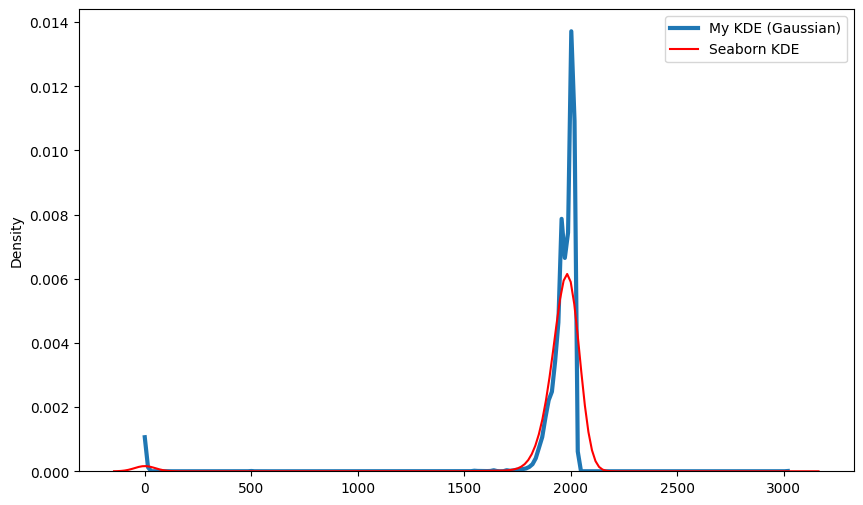

In [16]:
#Question 4
#Import necesary components
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns
#Load the sharks data set from my google drive
#I chose to work with the sharks dataset
df = pd.read_csv('/content/drive/MyDrive/DATA/sharks.csv')
#Load the right columns of the data set
#Choose to work with the year dataset
#It's a numeric column
print(df.select_dtypes(include='number').columns)
data = df['Year'].dropna().values
#Use the silverman bandwith as suggested in the directions
def silverman_bandwidth(x):
    x = np.asarray(x)
    n = len(x)
    sd = np.std(x)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    scale = min(sd, iqr / 1.34)
    return 0.9 * scale * n ** (-1/5)
#Define the various kernals
#Guassian kernals as suggested in the directions
def gaussian_kernel(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)
#Uniform kernal
def uniform_kernel(z):
    return 0.5 * np.where(np.abs(z) <= 1, 1, 0)
#Epanechnikov kernal
def epanechnikov_kernel(z):
    return 0.75 * (1 - z**2) * np.where(np.abs(z) <= 1, 1, 0)
#Develop the custom kernal density
def my_kde(x, kernel="gaussian", bandwidth=None, gridsize=200):
    x = np.asarray(x)

    if bandwidth is None:
        bandwidth = silverman_bandwidth(x)

    if kernel == "gaussian":
        K = gaussian_kernel
    elif kernel == "uniform":
        K = uniform_kernel
    elif kernel == "epanechnikov":
        K = epanechnikov_kernel
    else:
        raise ValueError("Unknown kernel")

    xmin, xmax = x.min(), x.max()
    grid = np.linspace(xmin, xmax, gridsize)

    distances = cdist(grid.reshape(-1,1), x.reshape(-1,1), metric='euclidean')
    z = distances / bandwidth
    kernel_vals = K(z)

    density = kernel_vals.mean(axis=1) / bandwidth
    return grid, density
#As a result, plot KDE versus seaborn
grid, density = my_kde(data, kernel="gaussian")

plt.figure(figsize=(10,6))
plt.plot(grid, density, label="My KDE (Gaussian)", linewidth=3)
sns.kdeplot(data, label="Seaborn KDE", color='red')
plt.legend()
plt.show()

